In [1]:
import numpy as np
import pandas as pd
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
df_train = pd.read_csv("../8th_week/data/train2.csv")
df_test = pd.read_csv("../8th_week/data/test2.csv")
df_train.head()
#df_test.head()

# TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
# VisitNumber - an id corresponding to a single trip by a single customer
# Weekday - the weekday of the trip
# Upc - the UPC number of the product purchased
# ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
# DepartmentDescription - a high-level description of the item's department
# FinelineNumber - a more refined category for each of the products, created by Walmart

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


# step1. EDA

In [3]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [4]:
print('Dataframe dimensions:', df_train.shape)

Dataframe dimensions: (647054, 7)


In [5]:
# 숫자형 특성의 요약정보
df_train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [6]:
# 범주형 특성의 정보
df_train["Weekday"].value_counts()

Sunday       133975
Saturday     122096
Friday        96247
Monday        83130
Tuesday       72529
Wednesday     71115
Thursday      67962
Name: Weekday, dtype: int64

(array([0.24791079, 0.21412432, 0.        , 0.31449204, 0.        ,
        0.34508969, 0.17505494, 0.        , 0.18681851, 0.18317637]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


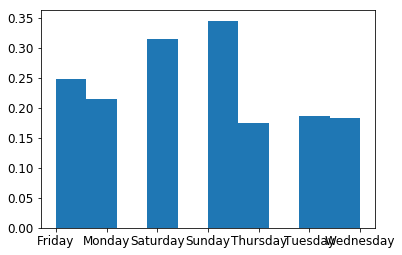

In [7]:
plt.hist(df_train.Weekday, normed=True)

In [8]:
df_train["DepartmentDescription"].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

(array([0.00797779, 0.00635323, 0.03256206, 0.02548519, 0.01892628,
        0.0077421 , 0.00797188, 0.01813468, 0.0167099 , 0.00519572]),
 array([-1. ,  5.8, 12.6, 19.4, 26.2, 33. , 39.8, 46.6, 53.4, 60.2, 67. ]),
 <a list of 10 Patch objects>)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


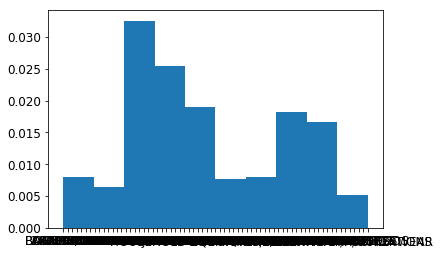

In [9]:
plt.hist(df_train.DepartmentDescription, normed=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


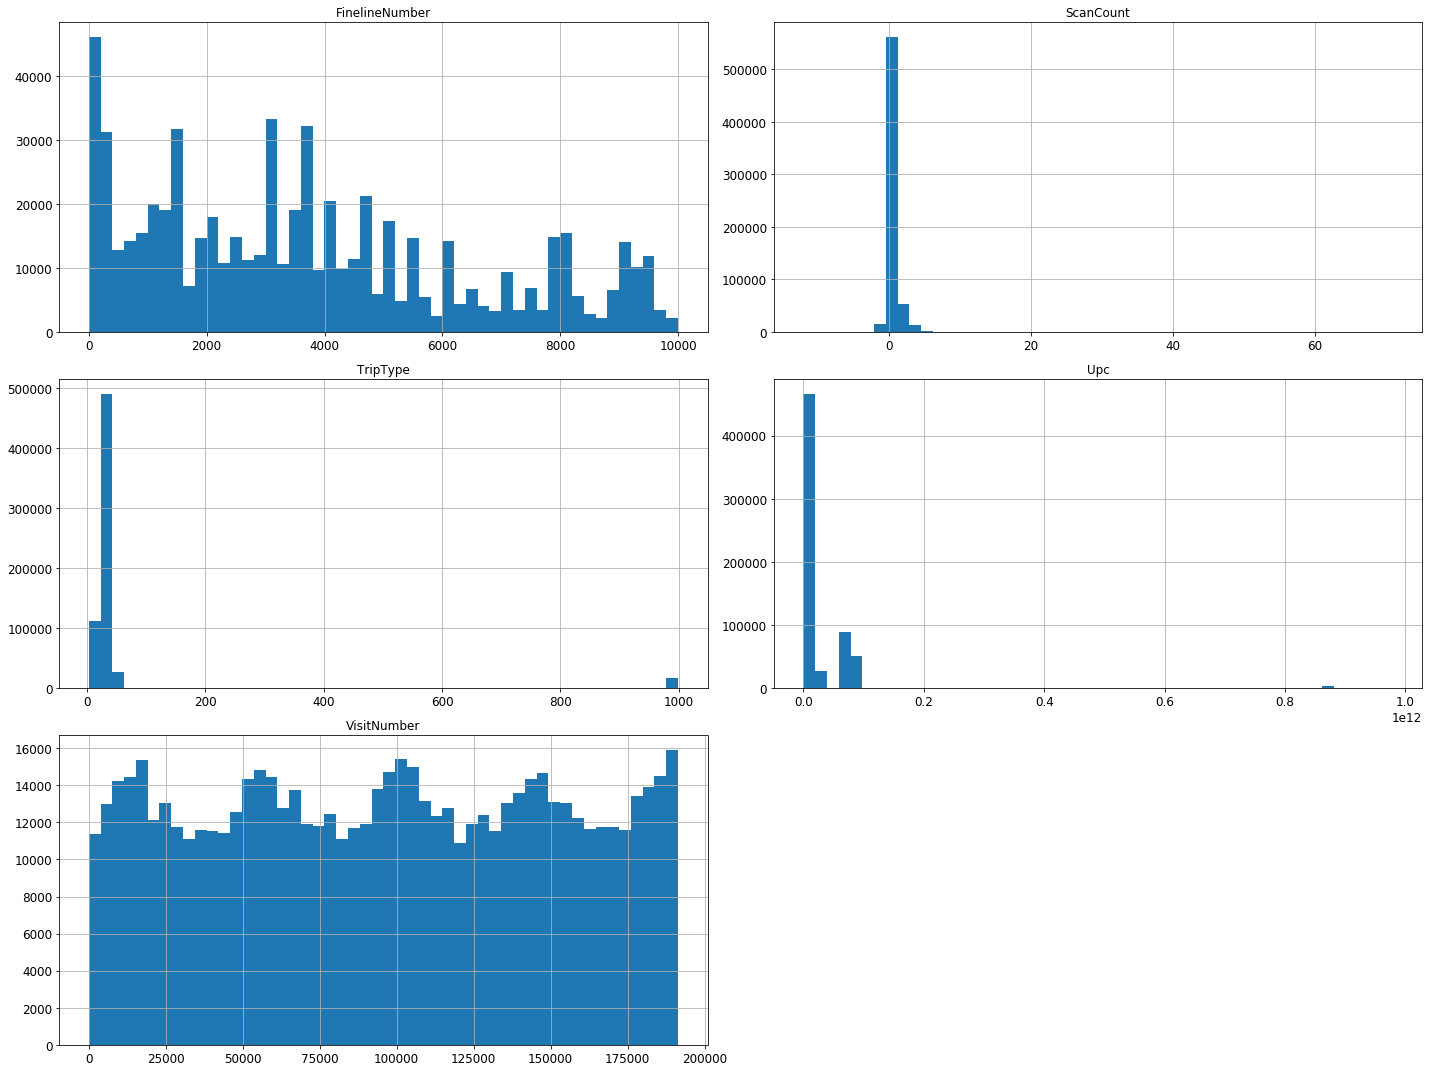

In [10]:
df_train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [11]:
corr_matrix = df_train.corr()
corr_matrix["TripType"].sort_values(ascending=False)

TripType          1.000000
Upc               0.047150
VisitNumber       0.000805
FinelineNumber   -0.028604
ScanCount        -0.286024
Name: TripType, dtype: float64

#step2. data preprocessing

In [12]:
from sklearn import preprocessing

def get_features(df_train):
    # basic data fields
    df_train['Upc'].fillna(value=-1, inplace=True)
    df_train['DepartmentDescription'] = preprocessing.LabelEncoder().fit_transform(list(df_train['DepartmentDescription']))
    df_train['FinelineNumber'].fillna(value=9999, inplace=True)
    df_train['Weekday'] = preprocessing.LabelEncoder().fit_transform(list(df_train['Weekday']))
    df_train['Count'] = df_train['ScanCount']
    df_train['Count'][df_train['ScanCount']<0]=0

    # min max mean range
    df  = df_train.groupby(['VisitNumber', 'DepartmentDescription'], as_index=False)['Count'].sum()
    df1 = df.groupby(['VisitNumber'], as_index=False)['Count'].min()
    df2 = df.groupby(['VisitNumber'], as_index=False)['Count'].max()
    df3 = df.groupby(['VisitNumber'], as_index=False)['Count'].mean()
    df1.rename(columns={'Count': 'Min'}, inplace=True)
    df2.rename(columns={'Count': 'Max'}, inplace=True)
    df3.rename(columns={'Count': 'Mean'}, inplace=True)
    df_train = df_train.merge(df1, how='left', on=['VisitNumber'], copy=True)
    df_train = df_train.merge(df2, how='left', on=['VisitNumber'], copy=True)
    df_train = df_train.merge(df3, how='left', on=['VisitNumber'], copy=True)
    df_train['Range'] = df_train['Max'] - df_train['Min']

    # null negative missing 
    df = df_train[df_train['DepartmentDescription']==67]
    df = df.groupby(['VisitNumber'], as_index=False)['Count'].count()
    df.rename(columns={'Count': 'Null'}, inplace=True) 
    df_train = df_train.merge(df, how='left', on=['VisitNumber'], copy=True) 
    df_train['Null'].fillna(value=0, inplace=True) 
    df_train['Null'][df_train['Null']>0] = 1
    df = df_train[df_train['ScanCount']<0]
    df = df.groupby(['VisitNumber'], as_index=False)['Count'].count()
    df.rename(columns={'Count': 'Has_Neg'}, inplace=True) 
    df_train = df_train.merge(df, how='left', on=['VisitNumber'], copy=True) 
    df_train['Has_Neg'].fillna(value=0, inplace=True)
    df_train['Has_Neg'][df_train['Has_Neg']>0] = 1
    df = df_train[df_train['FinelineNumber']==9999]
    df = df.groupby(['VisitNumber'], as_index=False)['Count'].count()
    df.rename(columns={'Count': 'Missing'}, inplace=True) 
    df_train = df_train.merge(df, how='left', on=['VisitNumber'], copy=True) 
    df_train['Missing'].fillna(value=0, inplace=True)
    df_train['Missing'][df_train['Missing']>0] = 1
    
    # sum
    df = df_train.groupby(['VisitNumber'], as_index=False)['Count'].sum()
    df.rename(columns={'Count': 'Sum'}, inplace=True) 
    df_train = df_train.merge(df, how='left', on=['VisitNumber'], copy=True)
    
    return df_train

In [16]:
from sklearn.model_selection import train_test_split

df_train = get_features(df_train)
train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying t

In [17]:
walmart = train_set.drop("TripType", axis=1) # 훈련 세트를 위해 레이블 삭제
walmart_labels = train_set["TripType"].copy()

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(walmart, walmart_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
from sklearn.metrics import mean_squared_error

walmart_predictions = lin_reg.predict(walmart)
lin_mse = mean_squared_error(walmart_labels, walmart_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

130.4165188977908

In [20]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(walmart_labels, walmart_predictions)
lin_mae

45.59117256662976

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(walmart, walmart_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [22]:
walmart_predictions = tree_reg.predict(walmart)
tree_mse = mean_squared_error(walmart_labels, walmart_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, walmart, walmart_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [92.0287089  93.59302187 94.73218188 93.10431293 94.90621319 95.51491166
 92.5808704  92.05817412 94.33222348 91.36535916]
평균: 93.42159775913936
표준편차: 1.341528046641284


In [25]:
lin_scores = cross_val_score(lin_reg, walmart, walmart_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [131.9896936  130.40261452 126.06881045 131.2032838  127.42956627
 134.44343276 129.15553472 131.43022018 132.20904885 129.82788925]
평균: 130.41600944000075
표준편차: 2.3089365152681776


In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(walmart, walmart_labels)

walmart_predictions = forest_reg.predict(walmart)
forest_mse = mean_squared_error(walmart_labels, walmart_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [28]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, walmart, walmart_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [72.42821581 70.94014503 70.04994508 72.3167773  69.41758812 73.21046598
 66.87927795 72.69870424 71.98612447 71.99723357]
평균: 71.19244775504477
표준편차: 1.8311902736361652


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

# forest_reg = RandomForestRegressor(random_state=42)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=5, scoring='neg_mean_squared_error', 
#                                 random_state=42, n_jobs=-1)
# rnd_search.fit(walmart, walmart_labels)

In [30]:
# feature_importances = rnd_search.best_estimator_.feature_importances_
# feature_importances

# final_model

In [31]:
# final_model = rnd_search.best_estimator_
# max_features=7, n_estimators=180

# X_test = test_set.drop("TripType", axis=1)
# y_test = test_set["TripType"].copy()

# X_test_prepared = full_pipeline.transform(X_test)
# final_predictions = final_model.predict(X_test)

# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)

# final_rmse #65.34578544268167

In [32]:
# path_sample_submission = "../8th_week/data/sample_submission.csv"
# path_submission = "../8th_week/data/submission.csv"

# def save_submission(predictions):
#     sample_submission = pd.read_csv(path_sample_submission)
#     columns = list(sample_submission.columns)
#     columns.remove('VisitNumber')
#     sample_submission[columns] = predictions
#     #????
#     sample_submission.to_csv(path_submission, index=False)

## - Random Forest


- k-means
- PCA
- GMM
- GBM

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42, max_features=7, n_estimators=180)
clf.fit(walmart, walmart_labels)
final_predictions = clf.predict(walmart)

forest_mse = mean_squared_error(walmart_labels, final_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

120.57884855498817

In [43]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = walmart.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances
# final_predictions.shape # (653646, 38)

,importance
Sum,0.572227
Range,0.251630
Max,0.096484
Mean,0.047192
Min,0.021412
Count,0.006404
Upc,0.001927
ScanCount,0.001908
DepartmentDescription,0.000798
FinelineNumber,0.000020


In [64]:
from sklearn.ensemble import ExtraTreesClassifier

clf2 = ExtraTreesClassifier(n_estimators=180, criterion='entropy', max_depth=15,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=0.5,
                             max_leaf_nodes=None, bootstrap=False, oob_score=False,
                             n_jobs=2, random_state=42, verbose=0)
clf2.fit(walmart, walmart_labels)
final_predictions = clf2.predict(walmart_test)
final_predictions

array([30, 39, 39, ..., 25, 28, 25], dtype=int64)

## - k-means
- PCA
- GMM
- GBM

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(walmart, walmart_labels)
final_predictions = knn.predict_proba(walmart)

knn_mse = mean_squared_error(walmart_labels, final_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.4, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 0.4],
       [0. , 0. , 0. , ..., 0. , 0.2, 0. ]])

In [46]:
num_class = len(np.unique(walmart_labels))
num_class

38

In [59]:
from sklearn.cluster import KMeans

clf3 = KMeans(n_clusters = num_class, random_state=42)
clf3.fit(walmart)
# final_predictions = clf3.predict_proba(walmart_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=38, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

## - PCA
- GMM
- GBM

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

scaler = StandardScaler()
train = scaler.fit_transform(walmart)
test = scaler.transform(walmart_test)

train = pca.fit_transform(train)
test = pca.transform(test)

clf4 = KNeighborsClassifier()
clf4.fit(train, walmart_labels)
final_predictions = clf4.predict_proba(test)
final_predictions

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:616: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.4, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [53]:
pca = PCA()
pca.fit(walmart)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [54]:
d

1

In [58]:
from sklearn.linear_model import LogisticRegression

pca2 = PCA(n_components=0.95)
walmart_reduced = pca2.fit_transform(walmart)

log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
log_clf2.fit(walmart_reduced, walmart_labels)
walmart_predictions = log_clf2.predict(walmart_reduced)

pca_mse = mean_squared_error(walmart_labels, walmart_predictions)
pca_rmse = np.sqrt(forest_mse)
pca_rmse

29.775378694121

## - lightGBM

In [82]:
import lightgbm as lgb

labels = np.sort(np.unique(walmart_labels))
num_class = len(labels)

params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'max_depth': 5,
        'num_leaves': 31,
        'learning_rate': 0.025,
        'feature_fraction': 0.85,
        'bagging_fraction': 0.85,
        'bagging_freq': 5,
        'verbose': 0,
        'num_threads': 1,
        'lambda_l2': 1.0,
        'min_gain_to_split': 0,
        'num_class': num_class,
    }

X_train = walmart
Y_train = walmart_labels
X_val = test_set.drop("TripType", axis=1) # 훈련 세트를 위해 레이블 삭제
Y_val = test_set["TripType"].copy()

rounds = 15000
d_train = lgb.Dataset(X_train, label=Y_train, silent=True)
d_valid = lgb.Dataset(X_val, label=Y_val, silent=True)

valid_sets = [d_train, d_valid]
valid_names = ['train', 'valid']
# gbdt = lgb.train(params, d_train, rounds, valid_sets=valid_sets, valid_names=valid_names, verbose_eval=20)

# features = gbdt.feature_name()
# importance = list(gbdt.feature_importance())
# importance = zip(features, importance)
# importance = sorted(importance, key=lambda x: x[1])
# total = sum(j for i, j in importance)
# importance = [(i, float(j)/total) for i, j in importance]
# importance

### market basket analysis

	데이터는 매우 크지만 희소행렬로 구성되어있다, 각 컬럼은 아이템 또는 상품들로 구성
	각 row는 거래를 나타낸다. 많은 상품들은 함께 구매되고 (빵과 버터) 상관관계를 갖는다
	고객이 구매한 데이터가 주어지면 고객이 구매할 아이템들을 예측하는것
	일반적으로 frequent itemset mining 으로 해결한다. association rules 를 만들어서 

In [36]:
pivot_table = pd.pivot_table(df_train, index=["VisitNumber"], columns=["DepartmentDescription"], fill_value=0, aggfunc=len, margins=True)
pivot_table

Count                                                  \
DepartmentDescription     0     1     2     3     4      5     6    7     8   
VisitNumber                                                                   
5                         0     0     0     0     0      0     0    0     0   
7                         0     0     0     0     0      0     0    0     0   
8                         0     0     0     0     0      0     0    0     0   
9                         0     0     0     0     0      0     0    0     0   
10                        0     0     0     0     0      0     0    0     0   
11                        0     0     0     0     0      0     0    0     0   
12                        0     0     0     0     0      0     0    0     2   
15                        0     0     0     0     0      0     0    0     0   
17                        0     0     0     0     0      0     0    0     0   
19                        0     1     0     0     0      0     0    0     0   
20                        0     0     0     0     0      0     0    0     0   
23                        0     0     0     0     0      0     0    0     0   
25                        0     0     0     0     0      0     0    0     0   
26                        0     0     0     0     0      0     0    0     0   
28                        0     0     0     2     0      0     0    0     0   
29                        0     0     0     0     0      0     0    0     0   
30                        0     0     0     0     0      0     0    0     0   
31                        0     0     0     1     0      0     0    0     0   
32                        0     0     0     0     0      0     0    0     0   
33                        0     0     0     0     0      0     0    0     0   
40                        0     0     0     0     0      0     0    0     0   
41                        0     0     0     0     0      0     0    0     0   
42                        0     0     0     0     0      0     0    0     0   
43                        0     0     0     0     0      0     0    0     0   
45                        0     0     0     0     0      0     0    0     0   
47                        0     0     0     0     0      0     0    0     0   
49                        0     0     0     0     0      0     0    0     0   
50                        0     0     0     0     0      0     0    0     0   
51                        0     0     0     0     0      0     0    0     0   
53                        0     0     0     0     0      0     0    0     0   
...                     ...   ...   ...   ...   ...    ...   ...  ...   ...   
191277                    0     0     0     0     0      1     0    0     0   
191280                    0     0     0     0     0      0     0    0     0   
191283                    0     0     0     0     0      1     0    0     0   
191286                    0     0     0     0     0      0     0    0     0   
191287                    0     0     0     0     0      0     0    0     0   
191289                    0     0     0     0     0      0     0    0     0   
191291                    0     0     0     0     0      0     0    0     0   
191293                    0     0     0     0     2      2     0    0     0   
191298                    0     0     1     1     0      2     0    0     0   
191301                    0     0     0     0     2      0     0    0     0   
191304                    0     0     0     0     0      0     0    0     0   
191305                    0     0     0     0     0      0     0    0     0   
191311                    0     0     0     0     0      0     0    0     0   
191312                    0     0     0     0     0      0     0    0     0   
191313                    0     0     0     0     0      0     0    0     0   
191318                    0     0     0     0     0      0     0    0     0   
191322                    0     0     0     0     0      0     0    0   

In [90]:
df_tran = df_train.groupby(['VisitNumber', 'DepartmentDescription'], as_index="VisitNumber")['Count'].sum()
df_tran = df_tran.unstack("DepartmentDescription", fill_value=0)
df_tran

DepartmentDescription,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_tran, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.060800,[2]
1,0.088164,[3]
2,0.053306,[4]
3,0.162740,[5]
4,0.124193,[11]
5,0.107082,[12]
6,0.184502,[13]
7,0.089230,[15]
8,0.532370,[16]
9,0.842517,[17]


In [115]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.06)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16),(13),0.532370,0.184502,0.063382,0.119056,0.645285,-0.034841,0.925710
1,(13),(16),0.184502,0.532370,0.063382,0.343530,0.645285,-0.034841,0.712340
2,(17),(13),0.842517,0.184502,0.069841,0.082896,0.449297,-0.085604,0.889210
3,(13),(17),0.184502,0.842517,0.069841,0.378541,0.449297,-0.085604,0.253408
4,(24),(13),0.934977,0.184502,0.072089,0.077102,0.417893,-0.100416,0.883628
5,(13),(24),0.184502,0.934977,0.072089,0.390721,0.417893,-0.100416,0.106721
6,(57),(13),0.560215,0.184502,0.057246,0.102187,0.553853,-0.046114,0.908316
7,(13),(57),0.184502,0.560215,0.057246,0.310276,0.553853,-0.046114,0.637625
8,(16),(17),0.532370,0.842517,0.116521,0.218871,0.259783,-0.332011,0.201609
9,(17),(16),0.842517,0.532370,0.116521,0.138301,0.259783,-0.332011,0.542683


In [116]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.06)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16),(13),0.532370,0.184502,0.063382,0.119056,0.645285,-0.034841,0.925710
1,(13),(16),0.184502,0.532370,0.063382,0.343530,0.645285,-0.034841,0.712340
2,(17),(13),0.842517,0.184502,0.069841,0.082896,0.449297,-0.085604,0.889210
3,(13),(17),0.184502,0.842517,0.069841,0.378541,0.449297,-0.085604,0.253408
4,(24),(13),0.934977,0.184502,0.072089,0.077102,0.417893,-0.100416,0.883628
5,(13),(24),0.184502,0.934977,0.072089,0.390721,0.417893,-0.100416,0.106721
6,(57),(13),0.560215,0.184502,0.057246,0.102187,0.553853,-0.046114,0.908316
7,(13),(57),0.184502,0.560215,0.057246,0.310276,0.553853,-0.046114,0.637625
8,(16),(17),0.532370,0.842517,0.116521,0.218871,0.259783,-0.332011,0.201609
9,(17),(16),0.842517,0.532370,0.116521,0.138301,0.259783,-0.332011,0.542683


In [117]:
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(16),(13),0.532370,0.184502,0.063382,0.119056,0.645285,-0.034841,0.925710,1
1,(13),(16),0.184502,0.532370,0.063382,0.343530,0.645285,-0.034841,0.712340,1
2,(17),(13),0.842517,0.184502,0.069841,0.082896,0.449297,-0.085604,0.889210,1
3,(13),(17),0.184502,0.842517,0.069841,0.378541,0.449297,-0.085604,0.253408,1
4,(24),(13),0.934977,0.184502,0.072089,0.077102,0.417893,-0.100416,0.883628,1
5,(13),(24),0.184502,0.934977,0.072089,0.390721,0.417893,-0.100416,0.106721,1
6,(57),(13),0.560215,0.184502,0.057246,0.102187,0.553853,-0.046114,0.908316,1
7,(13),(57),0.184502,0.560215,0.057246,0.310276,0.553853,-0.046114,0.637625,1
8,(16),(17),0.532370,0.842517,0.116521,0.218871,0.259783,-0.332011,0.201609,1
9,(17),(16),0.842517,0.532370,0.116521,0.138301,0.259783,-0.332011,0.542683,1


In [118]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.5) &
       (rules['lift'] > 1.0) ]

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
50,"(24, 13)",(16),0.072089,0.532370,0.051174,0.709874,1.333421,0.012796,1.611815,2
62,"(24, 17)",(16),0.135596,0.532370,0.081715,0.602636,1.131987,0.009528,1.176830,2
66,"(16, 17)",(57),0.116521,0.560215,0.066486,0.570596,1.018530,0.001210,1.024175,2
68,"(17, 57)",(16),0.108368,0.532370,0.066486,0.613522,1.152435,0.008794,1.209979,2
72,"(16, 24)",(57),0.116124,0.560215,0.069611,0.599460,1.070054,0.004557,1.097980,2
74,"(24, 57)",(16),0.106069,0.532370,0.069611,0.656287,1.232764,0.013144,1.360523,2
84,"(16, 17, 24)",(57),0.081715,0.560215,0.053243,0.651573,1.163077,0.007465,1.262203,3
87,"(24, 17, 57)",(16),0.073709,0.532370,0.053243,0.722348,1.356853,0.014003,1.684231,3
90,"(16, 57)","(24, 17)",0.093777,0.135596,0.053243,0.567766,4.187195,0.040528,1.999854,2
93,"(24, 57)","(16, 17)",0.106069,0.116521,0.053243,0.501971,4.307998,0.040884,1.773951,2
